In [1]:
import mars_currents as mc
from mc import load_mag_data_rotate_to_mse as data_mse
import numpy as np
import pandas as pd

/home/apostolis/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_weak = pd.read_csv("mag_mso_2014-10-11_2020-08-13_n20_weak_sw.csv", index_col=0)

In [3]:
bow_shock_pars = {"x0": 0.74, "L": 1.82, "eps": 1.01}
df_weak

,time,Bx,By,Bz,X,Y,Z,X_aber,Y_aber,Z_aber,Bx_aber,By_aber,Bz_aber,p_dyn,M
178751,4.709846e+08,0.57,3.01,2.70,1.807118,0.874875,-1.569790,1.741688,0.998802,-1.569790,0.358645,3.042429,2.70,0.643941,11.197991
178752,4.709846e+08,-0.28,3.16,2.61,1.802891,0.879314,-1.578866,1.737161,1.002935,-1.578866,-0.499748,3.132771,2.61,0.643941,11.197991
178753,4.709846e+08,0.09,2.79,3.09,1.798615,0.883729,-1.587900,1.732588,1.007041,-1.587900,-0.104840,2.789482,3.09,0.643941,11.197991
178754,4.709846e+08,0.36,3.16,2.67,1.794293,0.888122,-1.596893,1.727970,1.011122,-1.596893,0.138693,3.177415,2.67,0.684257,11.245260
178755,4.709847e+08,0.63,2.10,3.64,1.789924,0.892491,-1.605844,1.723307,1.015176,-1.605844,0.481977,2.138831,3.64,0.684257,11.245260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9033407,6.506190e+08,-0.98,1.38,-0.28,1.198281,0.692386,-1.745290,1.147064,0.774287,-1.745290,-1.073877,1.308277,-0.28,0.425924,10.721951
9033408,6.506191e+08,-0.94,1.38,-0.49,1.192468,0.701899,-1.747711,1.140602,0.783372,-1.747711,-1.033974,1.311067,-0.49,0.425924,10.721951
9033409,6.506191e+08,-0.55,1.73,-0.19,1.186609,0.711385,-1.750062,1.134095,0.792426,-1.750062,-0.669339,1.687420,-0.19,0.425924,10.721951
9033410,6.506191e+08,-0.73,1.50,-0.15,1.180703,0.720843,-1.752345,1.127543,0.801449,-1.752345,-0.832856,1.445424,-0.15,0.425924,10.721951


In [4]:
df_orbits = pd.read_csv(
    "../maven_orbits.txt", sep=", ", header=2, engine="python"
)  # , names=["a", "b", "c"])
df_orbits = df_orbits[
    (df_orbits["START_ET"] >= df_weak.loc[df_weak.index[0], "time"] - 86400 * 2)
    & (df_weak.loc[df_weak.index[-1], "time"] + 86400 >= df_orbits["START_ET"])
]
df_orbits = df_orbits.drop(
    columns=[
        "ORBIT_NUMBER",
        "START_ET",
        "FINISH_ET",
        "START_UTC",
        "FINISH_UTC",
        "PERIAPSIS_UTC",
    ],
    axis=1,
)

In [5]:
smooth_factor = 15
aberation = 4

data_dict = dict(
    frame="ss",
    sampl="1s",
    start=None,
    end=None,
    freq_sampl=20,
    folder_path="../mag/pc1s/l2",
    kernel_path="../maven_spice/maven_time_frames.tm",
    orbits_file_path="../maven_orbits.txt",
    spice_pck="pck00010.tpc",
)

In [6]:
df_weak = data_mse.rotated_to_mse(
    data_dict=data_dict,
    aberation=aberation,
    smooth_factor=smooth_factor,
    bow_shock_pars=bow_shock_pars,
    save=[True, "_weak_sw"],
    out=True,
    df=df_weak,
    df_orbits=df_orbits,
)

('pck00010.tpc', 'TEXT', '', 0)

Saved file: mag_mse_2014-12-04_2020-08-13_n20_weak_sw.csv, of all data.

Saved file: mag_mse_2014-12-04_2020-08-13_ms_n20_weak_sw.csv, of data inside the bow shock.


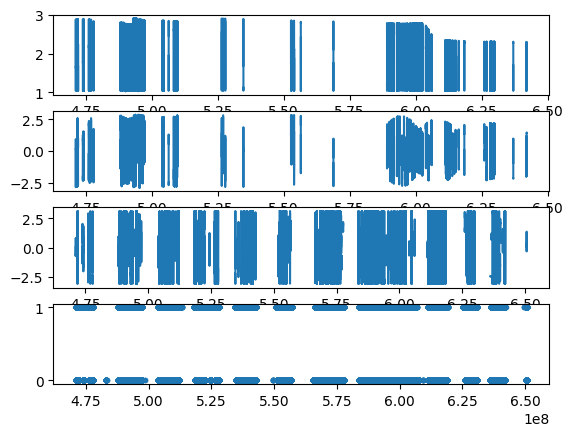

In [33]:
fig, ax = plt.subplots(4, 1)
# df_weak[0].R_mse.plot.line('.', markersize=0.4)
ax[0].plot(df_weak[0].time, df_weak[0].R_mse)
ax[1].plot(df_weak[0].time, df_weak[0].Z_mse)
ax[2].plot(df_weak[0].time, df_weak[0].clock_angle)
ax[3].plot(df_weak[0].time, df_weak[0]["loc"], ".")

In [24]:
df_weak[0]["time"]

178751     4.709846e+08
178752     4.709846e+08
178753     4.709846e+08
178754     4.709846e+08
178755     4.709847e+08
               ...     
9033407    6.506190e+08
9033408    6.506191e+08
9033409    6.506191e+08
9033410    6.506191e+08
9033411    6.506191e+08
Name: time, Length: 1189368, dtype: float64

In [14]:
import matplotlib
from matplotlib import pyplot as plt

In [31]:
df_weak[0].columns

Index(['time', 'Bx', 'By', 'Bz', 'X', 'Y', 'Z', 'X_aber', 'Y_aber', 'Z_aber',
       'Bx_aber', 'By_aber', 'Bz_aber', 'p_dyn', 'M', 'R', 'r_sp_cyl',
       'th_sp_cyl', 'r_bs', 'loc', 'clock_angle', 'Bx_mse', 'By_mse', 'Bz_mse',
       'X_mse', 'Y_mse', 'Z_mse', 'R_mse', 'th_mse', 'phi_mse'],
      dtype='object')